In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

/tmp/ipykernel_66/1850190382.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(logistic, years, values, p0=initial_guesses, maxfev=10000)


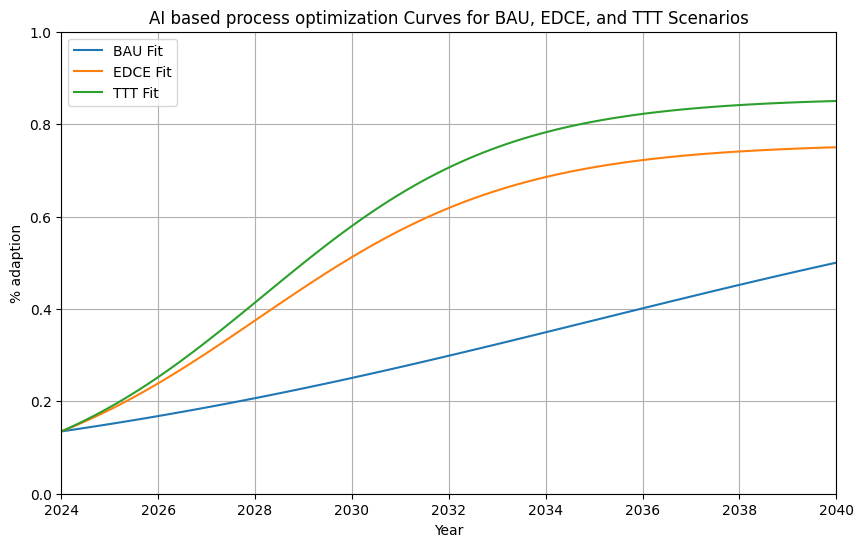

In [44]:
# Define the AI based process optimization function
def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Data for each scenario
data = {
    'BAU': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([474/3515, 881/3515, 1758/3515])  # 2030: If the trend continues, only 64% of businesses will use cloud, 50% big data, and 17% AI by the end of the decade.
    },
    'EDCE': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([474/3515, 1800/3515, 2636/3515]) # 2040 slow adoption 
    },
    
    'TTT': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([474/3515, 2037/3515, 2988/3515])  # 2030: assumption meeting EU targets
    }
}

# Fit logistic curves and plot
plt.figure(figsize=(10, 6))

for scenario, d in data.items():
    years = d['years']
    values = d['values']

    # Initial parameter guesses
    L_init = max(values)
    k_init = 0.05
    t0_init = np.median(years)
    initial_guesses = [L_init, k_init, t0_init]

    # Fit the curve
    params, _ = curve_fit(logistic, years, values, p0=initial_guesses, maxfev=10000)

    # Generate predictions
    predicted_years = np.linspace(min(years), max(years), 100)
    predicted_values = logistic(predicted_years, *params)

    # Plot
    plt.plot(predicted_years, predicted_values, label=f'{scenario} Fit')

# Plot settings
plt.xlabel('Year')
plt.ylim(0, 1) 
plt.xlim(2024, 2040)
plt.ylabel('% adaption')
plt.title('AI based process optimization Curves for BAU, EDCE, and TTT Scenarios')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_66/1784283652.py:41: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(logistic, years, values, p0=initial_guesses, bounds=bounds, maxfev=10000)


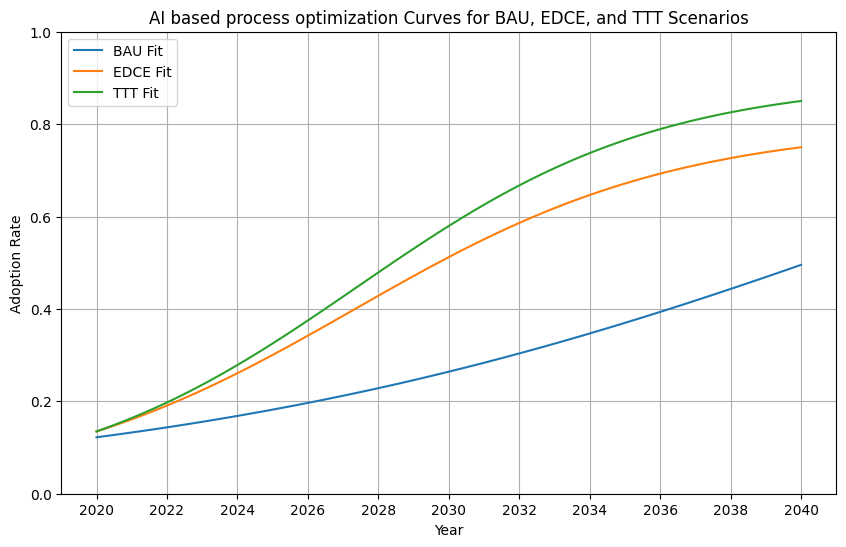

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the logistic function
def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Data for each scenario
data = {
    'BAU': {
        'years': np.array([2020, 2030, 2040]),
        'values': np.array([474/3515, 881/3515, 1758/3515])
    },
    'EDCE': {
        'years': np.array([2020, 2030, 2040]),
        'values': np.array([474/3515, 1800/3515, 2636/3515])
    },
    'TTT': {
        'years': np.array([2020, 2030, 2040]),
        'values': np.array([474/3515, 2037/3515, 2988/3515])
    }
}

# Fit and plot
plt.figure(figsize=(10, 6))

for scenario, d in data.items():
    years = d['years']
    values = d['values']

    # Initial guesses
    L_init = max(values)
    k_init = 0.1
    t0_init = np.median(years)
    initial_guesses = [L_init, k_init, t0_init]

    try:
        # Add reasonable bounds to avoid bad fits
        bounds = ([0, 0, 2000], [1.2, 1.0, 2050])  # [L, k, t0]
        params, _ = curve_fit(logistic, years, values, p0=initial_guesses, bounds=bounds, maxfev=10000)

        predicted_years = np.linspace(min(years), max(years), 100)
        predicted_values = logistic(predicted_years, *params)

        plt.plot(predicted_years, predicted_values, label=f'{scenario} Fit')
    except RuntimeError:
        print(f"Could not fit {scenario} curve — skipping.")

# Plot setup
plt.xlabel('Year')
plt.ylabel('Adoption Rate')
plt.ylim(0, 1)
plt.xticks(ticks=np.arange(2020, 2041, 2), labels=np.arange(2020, 2041, 2))
plt.title('AI based process optimization Curves for BAU, EDCE, and TTT Scenarios')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_66/1793311642.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(logistic, years, values, p0=initial_guesses, maxfev=10000)


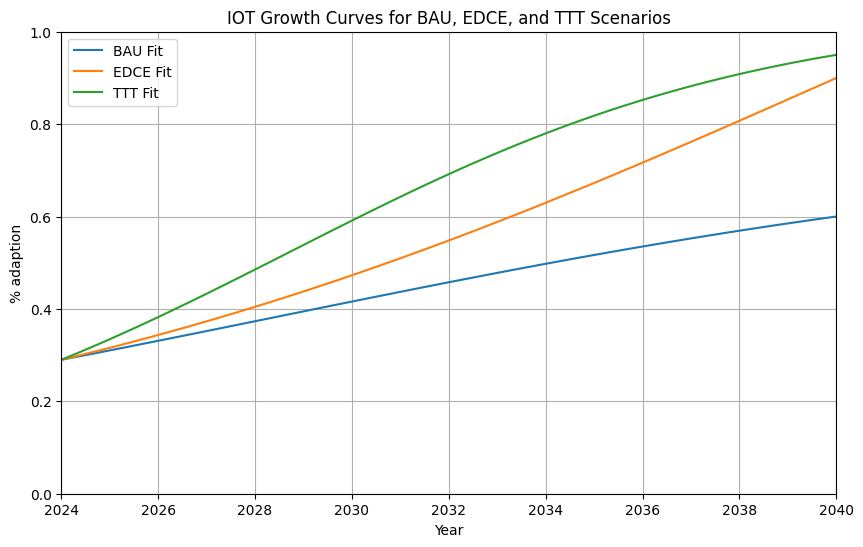

In [47]:
# Define the IOT logistic function
def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Data for each scenario
data = {
    'BAU': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([1019/3515, 1462/3515, 2109/3515])  # 2030: 3035-1821 =1214/16/6 + 1821
    },
    'EDCE': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([1019/3515, 1662/3515, 3163/3515]) # 2030: assumption meeting EU targets
    },
    
    'TTT': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([1019/3515, 2078/3515, 3339/3515])  # 2030: assumption meeting EU targets
    }
}

# Fit logistic curves and plot
plt.figure(figsize=(10, 6))

for scenario, d in data.items():
    years = d['years']
    values = d['values']

    # Initial parameter guesses
    L_init = max(values)
    k_init = 0.1
    t0_init = np.median(years)
    initial_guesses = [L_init, k_init, t0_init]

    # Fit the curve
    params, _ = curve_fit(logistic, years, values, p0=initial_guesses, maxfev=10000)

    # Generate predictions
    predicted_years = np.linspace(min(years), max(years), 100)
    predicted_values = logistic(predicted_years, *params)

    # Plot
    plt.plot(predicted_years, predicted_values, label=f'{scenario} Fit')

# Plot settings
plt.xlabel('Year')
plt.ylabel('% adaption')
plt.title('IOT Growth Curves for BAU, EDCE, and TTT Scenarios')
plt.legend()
plt.ylim(0, 1) 
plt.xlim(2024, 2040) 
plt.grid(True)
plt.show()

/tmp/ipykernel_66/139927114.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(logistic, years, values, p0=initial_guesses, maxfev=10000)


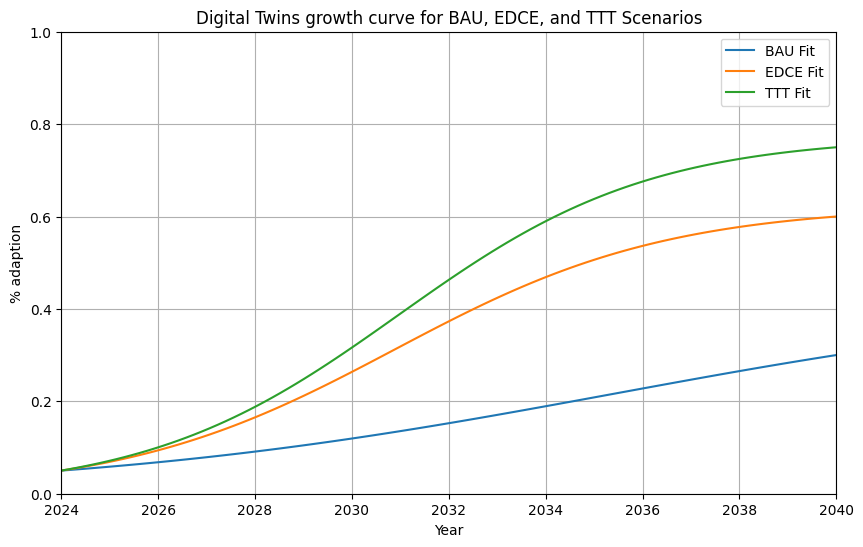

In [48]:
# Define the Digital Twins logistic function
def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Data for each scenario
data = {
    'BAU': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([176/3515, 420/3515, 1055/3515])  # 2030: assumption --> MEDIUM -20%
    },
    'EDCE': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([176/3515, 927/3515, 2109/3515]) # 2030: assumption 2030 --> 30%
    },
    
    'TTT': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([176/3515, 1112/3515, 2636/3515])  # 2030: MEDIUM +20%
    }
}

# Fit logistic curves and plot
plt.figure(figsize=(10, 6))

for scenario, d in data.items():
    years = d['years']
    values = d['values']

    # Initial parameter guesses
    L_init = max(values)
    k_init = 0.1
    t0_init = np.median(years)
    initial_guesses = [L_init, k_init, t0_init]

    # Fit the curve
    params, _ = curve_fit(logistic, years, values, p0=initial_guesses, maxfev=10000)

    # Generate predictions
    predicted_years = np.linspace(min(years), max(years), 100)
    predicted_values = logistic(predicted_years, *params)

    # Plot
    plt.plot(predicted_years, predicted_values, label=f'{scenario} Fit')

# Plot settings
plt.xlabel('Year')
plt.ylabel('% adaption')
plt.ylim(0, 1) 
plt.xlim(2024, 2040) 
plt.title('Digital Twins growth curve for BAU, EDCE, and TTT Scenarios')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_66/2836517377.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(logistic, years, values, p0=initial_guesses, maxfev=10000)


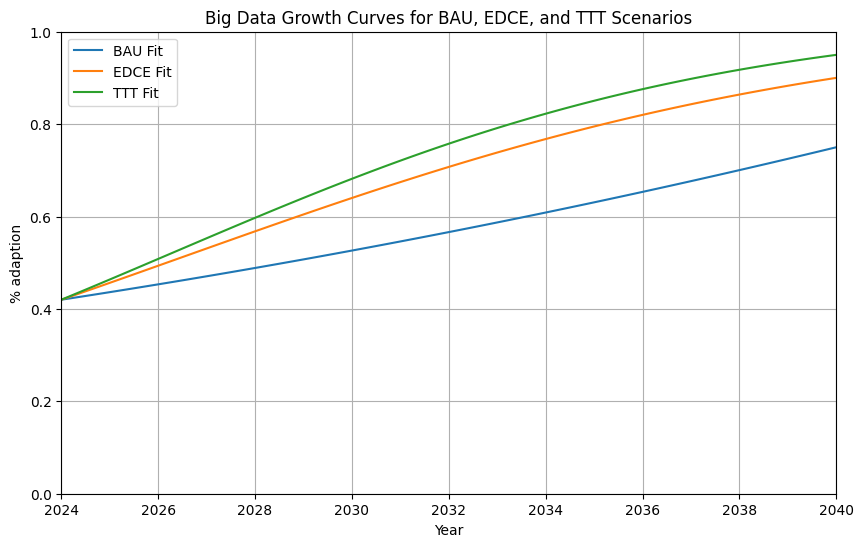

In [49]:
# Define the Big Data logistic function
def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Data for each scenario
data = {
    'BAU': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([1476/3515, 1850/3515, 2636/3515])  # 2030: If the trend continues, only 64% of businesses will use cloud, 50% big data, and 17% AI by the end of the decade.
    },
    'EDCE': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([1476/3515, 2250/3515, 3164/3515])
    },
    
    'TTT': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([1476/3515, 2396/3515, 3339/3515])  # 2030: assumption meeting EU targets
    }
}

# Fit logistic curves and plot
plt.figure(figsize=(10, 6))

for scenario, d in data.items():
    years = d['years']
    values = d['values']

    # Initial parameter guesses
    L_init = max(values)
    k_init = 0.1
    t0_init = np.median(years)
    initial_guesses = [L_init, k_init, t0_init]

    # Fit the curve
    params, _ = curve_fit(logistic, years, values, p0=initial_guesses, maxfev=10000)

    # Generate predictions
    predicted_years = np.linspace(min(years), max(years), 100)
    predicted_values = logistic(predicted_years, *params)

    # Plot
    plt.plot(predicted_years, predicted_values, label=f'{scenario} Fit')

# Plot settings
plt.xlabel('Year')
plt.ylabel('% adaption')
plt.title('Big Data Growth Curves for BAU, EDCE, and TTT Scenarios')
plt.legend()
plt.grid(True)
plt.ylim(0, 1) 
plt.xlim(2024, 2040) 
plt.show()

/tmp/ipykernel_96/244014511.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(logistic, years, values, p0=initial_guesses, maxfev=10000)


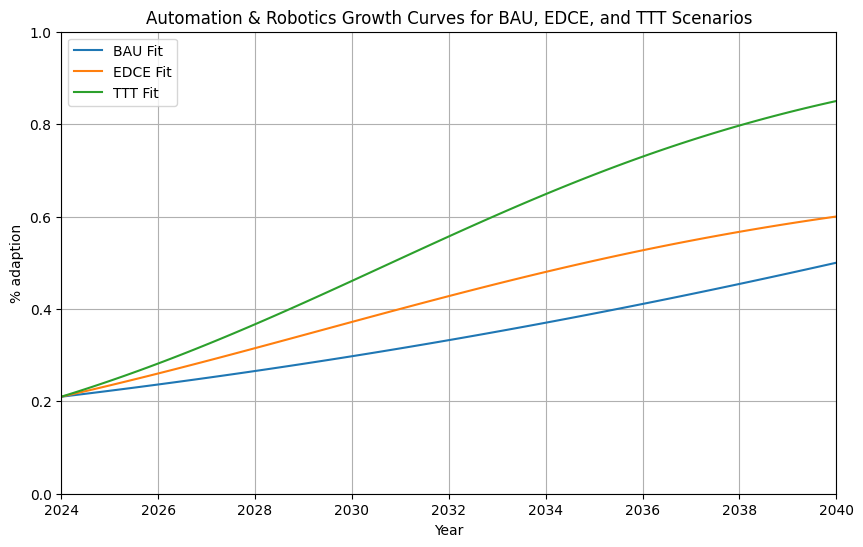

In [2]:
# Define the Automation & Robotics logistic function
def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Data for each scenario
data = {
    'BAU': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([738/3515, 1046/3515, 1757.5/3515])  # 2030: assumption 6% growth
    },
    'EDCE': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([738/3515, 1307/3515, 2109/3515]) # 2030 assumption 10% growth
    },
    
    'TTT': {
        'years': np.array([2024, 2030, 2040]),
        'values': np.array([738/3515, 1619/3515, 2987.75/3515])  # 2030: assumption 14% growth
    }
}

# Fit logistic curves and plot
plt.figure(figsize=(10, 6))

for scenario, d in data.items():
    years = d['years']
    values = d['values']

    # Initial parameter guesses
    L_init = max(values)
    k_init = 0.1
    t0_init = np.median(years)
    initial_guesses = [L_init, k_init, t0_init]

    # Fit the curve
    params, _ = curve_fit(logistic, years, values, p0=initial_guesses, maxfev=10000)

    # Generate predictions
    predicted_years = np.linspace(min(years), max(years), 100)
    predicted_values = logistic(predicted_years, *params)

    # Plot
    plt.plot(predicted_years, predicted_values, label=f'{scenario} Fit')

# Plot settings
plt.xlabel('Year')
plt.ylabel('% adaption')
plt.title('Automation & Robotics Growth Curves for BAU, EDCE, and TTT Scenarios')
plt.legend()
plt.ylim(0, 1) 
plt.xlim(2024, 2040) 
plt.grid(True)
plt.show()

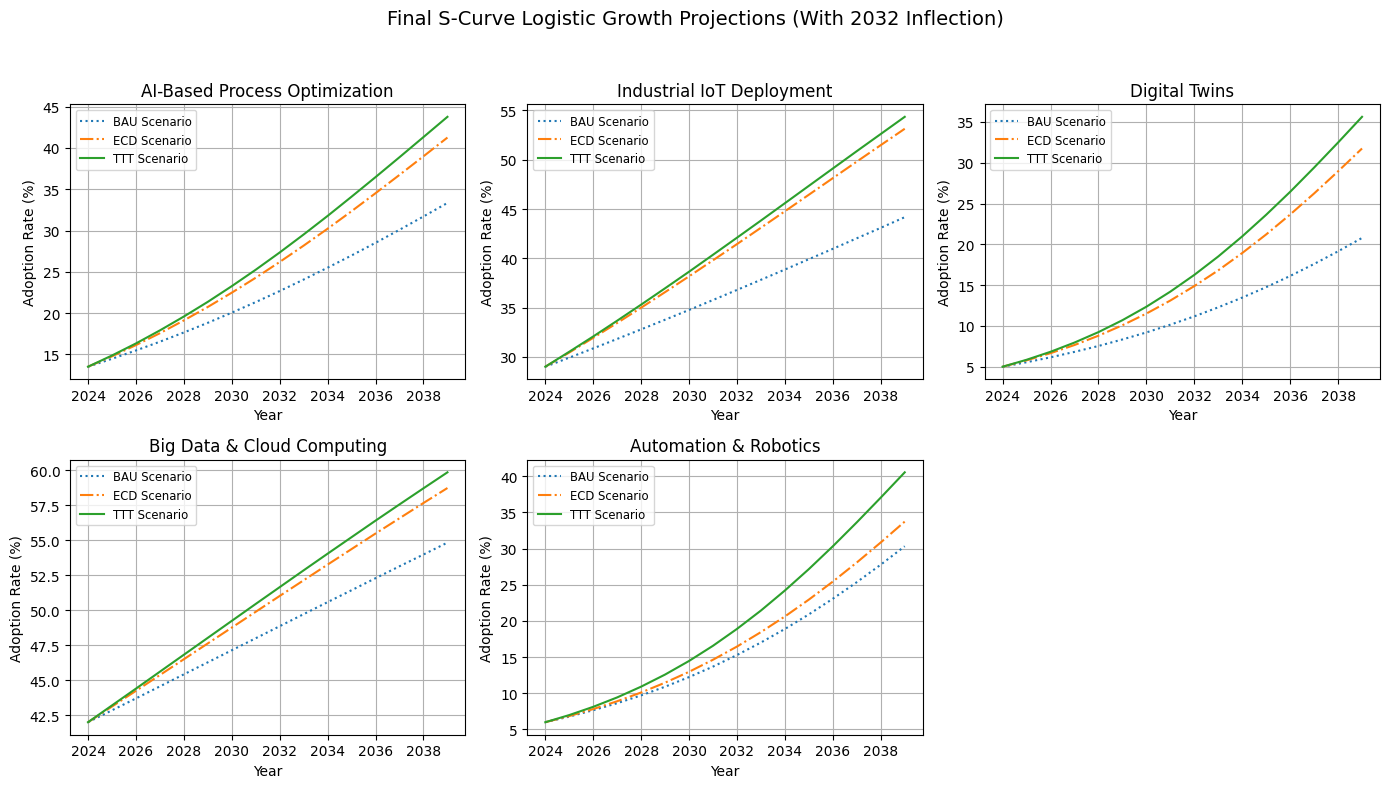

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setup
years = np.arange(2024, 2040)
total_firms = 3515

# Initial adoption percentages and caps
initial_adoption_percentages = {
    "AI-Based Process Optimization": 13.5,
    "Industrial IoT Deployment": 29.0,
    "Digital Twins": 5.0,
    "Big Data & Cloud Computing": 42.0,
    "Automation & Robotics": 6.0
}

max_adoption_percentages = {
    "AI-Based Process Optimization": 85,
    "Industrial IoT Deployment": 95,
    "Digital Twins": 75,
    "Big Data & Cloud Computing": 95,
    "Automation & Robotics": 85
}

# CAGR values by scenario
cagr_values = {
    "AI-Based Process Optimization": {"BAU": 8.54, "ECD": 11.32, "TTT": 12.2},
    "Industrial IoT Deployment": {"BAU": 4.65, "ECD": 7.330, "TTT": 7.70},
    "Digital Twins": {"BAU": 11.85, "ECD": 16.8, "TTT": 18.44},
    "Big Data & Cloud Computing": {"BAU": 3.69, "ECD": 4.88, "TTT": 5.23},
    "Automation & Robotics": {"BAU": 14.17, "ECD": 15.48, "TTT": 18.02}
}

# Logistic growth function with 2032 inflection
def s_curve_logistic_corrected(t, N_max, N_0, CAGR, t0=2024):
    b = np.log(1 + CAGR / 100)
    return N_max / (1 + ((N_max / N_0) - 1) * np.exp(-b * (t - t0)))

# Generate adoption data
results = []

for tech, scenarios in cagr_values.items():
    N_0 = (initial_adoption_percentages[tech] / 100) * total_firms
    N_max = (max_adoption_percentages[tech] / 100) * total_firms

    for scenario, CAGR in scenarios.items():
        for t in years:
            N_t = s_curve_logistic_corrected(t, N_max, N_0, CAGR)
            results.append({
                "Technology": tech,
                "Year": t,
                "Scenario": scenario,
                "Adoption (%)": round(N_t / total_firms * 100, 2)
            })

df = pd.DataFrame(results)

# Plotting in 2x3 grid (with one empty cell)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
fig.suptitle("Final S-Curve Logistic Growth Projections (With 2032 Inflection)", fontsize=14)

tech_list = list(cagr_values.keys())
linestyles = {"BAU": "dotted", "ECD": "dashdot", "TTT": "solid"}

for idx, tech in enumerate(tech_list):
    row, col = divmod(idx, 3)
    ax = axes[row, col]

    for scenario in ["BAU", "ECD", "TTT"]:
        data = df[(df["Technology"] == tech) & (df["Scenario"] == scenario)]
        ax.plot(data["Year"], data["Adoption (%)"], label=f"{scenario} Scenario", linestyle=linestyles[scenario])

    ax.set_title(tech)
    ax.set_xlabel("Year")
    ax.set_ylabel("Adoption Rate (%)")
    ax.legend(fontsize="small")
    ax.grid(True)

# Hide unused subplot
if len(tech_list) < 6:
    axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


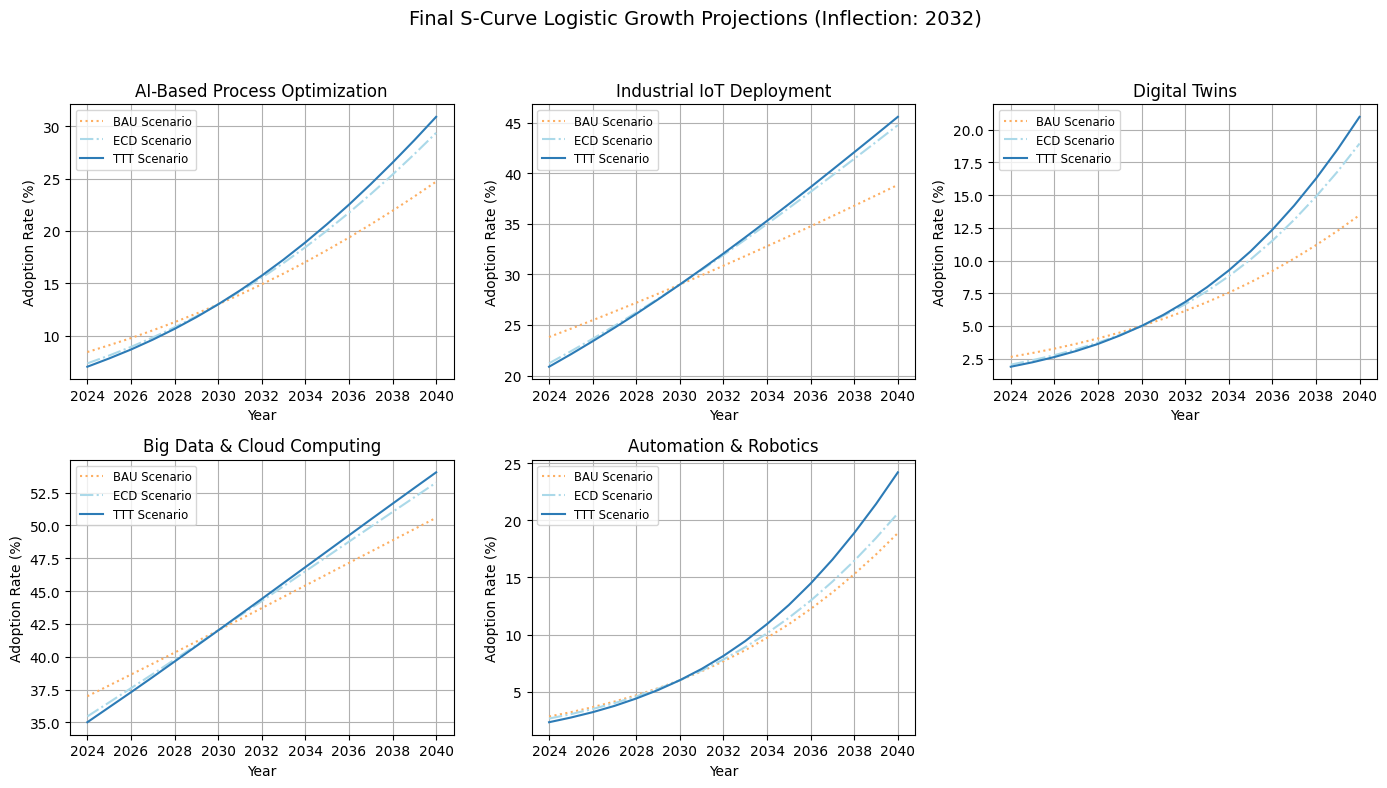

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setup
years = np.arange(2024, 2041)  # include 2040
total_firms = 3515

# Initial adoption percentages and caps
initial_adoption_percentages = {
    "AI-Based Process Optimization": 13.0,
    "Industrial IoT Deployment": 29.0,
    "Digital Twins": 5.0,
    "Big Data & Cloud Computing": 42.0,
    "Automation & Robotics": 6.0
}

max_adoption_percentages = {
    "AI-Based Process Optimization": 85,
    "Industrial IoT Deployment": 95,
    "Digital Twins": 75,
    "Big Data & Cloud Computing": 95,
    "Automation & Robotics": 85
}

# CAGR values by scenario
cagr_values = {
    "AI-Based Process Optimization": {"BAU": 8.54, "ECD": 11.32, "TTT": 12.2},
    "Industrial IoT Deployment": {"BAU": 4.65, "ECD": 7.33, "TTT": 7.70},
    "Digital Twins": {"BAU": 11.85, "ECD": 16.8, "TTT": 18.44},
    "Big Data & Cloud Computing": {"BAU": 3.69, "ECD": 4.88, "TTT": 5.23},
    "Automation & Robotics": {"BAU": 14.17, "ECD": 15.48, "TTT": 18.02}
}

# Logistic growth function with 2032 inflection
def s_curve_logistic_corrected(t, N_max, N_0, CAGR, t0=2030):
    b = np.log(1 + CAGR / 100)
    return N_max / (1 + ((N_max / N_0) - 1) * np.exp(-b * (t - t0)))

# Generate adoption data
results = []
for tech, scenarios in cagr_values.items():
    N_0 = (initial_adoption_percentages[tech] / 100) * total_firms
    N_max = (max_adoption_percentages[tech] / 100) * total_firms

    for scenario, CAGR in scenarios.items():
        for t in years:
            N_t = s_curve_logistic_corrected(t, N_max, N_0, CAGR)
            results.append({
                "Technology": tech,
                "Year": t,
                "Scenario": scenario,
                "Adoption (%)": round(N_t / total_firms * 100, 2)
            })

df = pd.DataFrame(results)

# Plotting in 2x3 grid (with one empty cell)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
fig.suptitle("Final S-Curve Logistic Growth Projections (Inflection: 2032)", fontsize=14)

tech_list = list(cagr_values.keys())
linestyles = {"BAU": "dotted", "ECD": "dashdot", "TTT": "solid"}
colors = {"BAU": "#fdae61", "ECD": "#abd9e9", "TTT": "#2c7bb6"}

for idx, tech in enumerate(tech_list):
    row, col = divmod(idx, 3)
    ax = axes[row, col]

    for scenario in ["BAU", "ECD", "TTT"]:
        data = df[(df["Technology"] == tech) & (df["Scenario"] == scenario)]
        ax.plot(data["Year"], data["Adoption (%)"],
                label=f"{scenario} Scenario",
                linestyle=linestyles[scenario],
                color=colors[scenario])

    ax.set_title(tech)
    ax.set_xlabel("Year")
    ax.set_ylabel("Adoption Rate (%)")
    ax.legend(fontsize="small")
    ax.grid(True)

# Hide unused subplot
if len(tech_list) < 6:
    axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


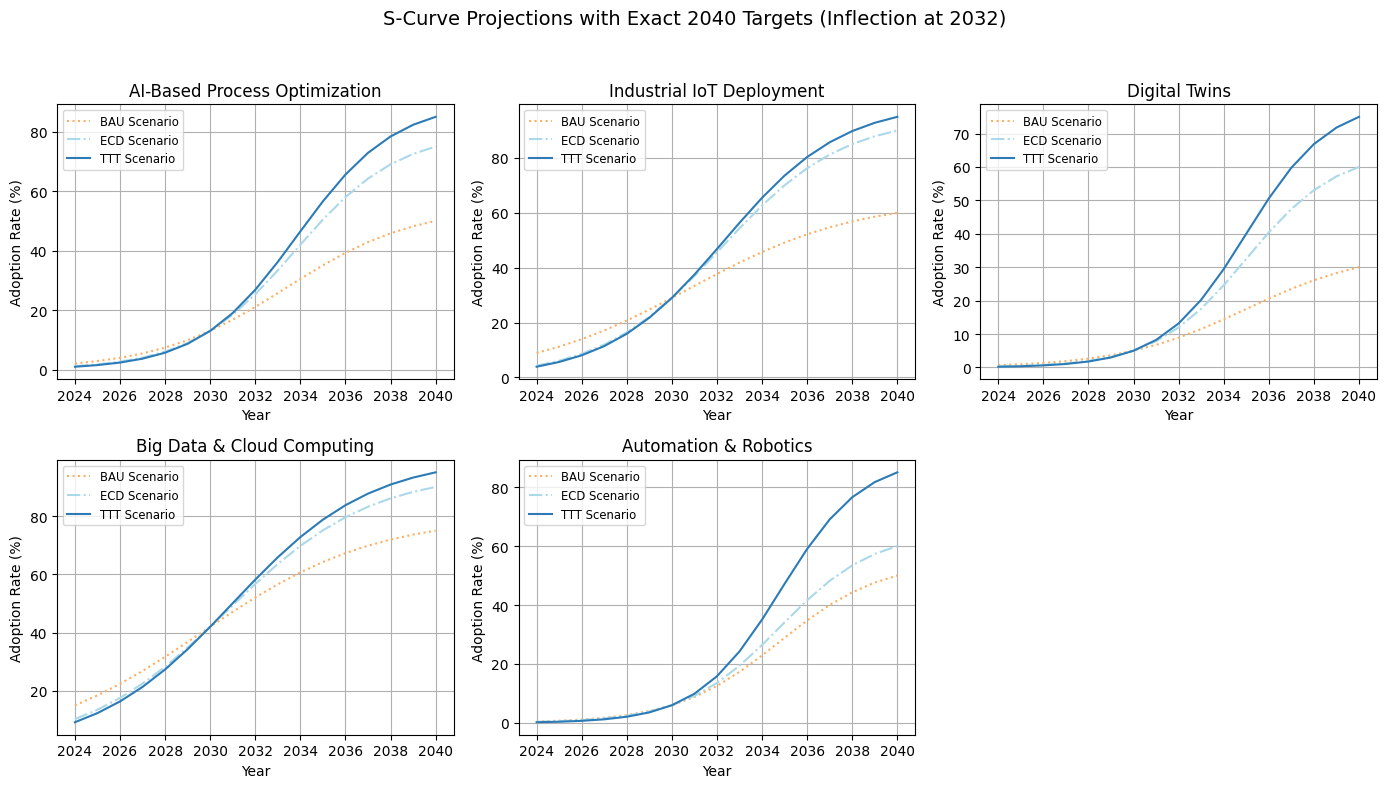

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Time range and inflection year
years = np.arange(2024, 2041)
t0 = 2030

# Adoption table with exact 2040 targets
adoption_targets_2040 = {
    "AI-Based Process Optimization": {"Current": 13, "BAU": 50, "ECD": 75, "TTT": 85},
    "Industrial IoT Deployment": {"Current": 29, "BAU": 60, "ECD": 90, "TTT": 95},
    "Digital Twins": {"Current": 5, "BAU": 30, "ECD": 60, "TTT": 75},
    "Big Data & Cloud Computing": {"Current": 42, "BAU": 75, "ECD": 90, "TTT": 95},
    "Automation & Robotics": {"Current": 6, "BAU": 50, "ECD": 60, "TTT": 85}
}

# Function to solve for logistic growth rate b
def solve_logistic_b(N0, N_target, N_max, t_target, t0):
    return -np.log((N_max / N_target - 1) / (N_max / N0 - 1)) / (t_target - t0)

# Logistic function
def logistic_with_target(t, N_max, N_0, b, t0):
    return N_max / (1 + ((N_max / N_0) - 1) * np.exp(-b * (t - t0)))

# Generate data
results = []

for tech, values in adoption_targets_2040.items():
    N0 = values["Current"]
    for scenario in ["BAU", "ECD", "TTT"]:
        N_target = values[scenario]
        N_max = max(N0, N_target) + 5  # artificial cap just above target
        b = solve_logistic_b(N0, N_target, N_max, 2040, t0)

        for year in years:
            N_t = logistic_with_target(year, N_max, N0, b, t0)
            results.append({
                "Technology": tech,
                "Year": year,
                "Scenario": scenario,
                "Adoption (%)": round(N_t, 2)
            })

# Convert to DataFrame
df = pd.DataFrame(results)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
fig.suptitle("S-Curve Projections with Exact 2040 Targets (Inflection at 2032)", fontsize=14)

tech_list = list(adoption_targets_2040.keys())
linestyles = {"BAU": "dotted", "ECD": "dashdot", "TTT": "solid"}
colors = {"BAU": "#fdae61", "ECD": "#abd9e9", "TTT": "#2c7bb6"}

for idx, tech in enumerate(tech_list):
    row, col = divmod(idx, 3)
    ax = axes[row, col]

    for scenario in ["BAU", "ECD", "TTT"]:
        scenario_data = df[(df["Technology"] == tech) & (df["Scenario"] == scenario)]
        ax.plot(scenario_data["Year"], scenario_data["Adoption (%)"],
                label=f"{scenario} Scenario",
                linestyle=linestyles[scenario],
                color=colors[scenario])

    ax.set_title(tech)
    ax.set_xlabel("Year")
    ax.set_ylabel("Adoption Rate (%)")
    ax.legend(fontsize="small")
    ax.grid(True)

# Hide empty subplot if needed
if len(tech_list) < 6:
    axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
